# Table of Contents
* [Data Preprocessing](#data-preprocessing)
    * [Data Loading](#data-loading)
    * [Filter Out High-value Customers](#filter-customers)
    * [Define Target Variable (Churn)](#define-churn)
    * [Filter Out Single Unique Values](#filter-single)
    * [Missing Values](#missing-values)
    * [Derive Features](#derive-features)
    * [Filter Out Highly Related Features](#filter-related)
    * [Prepare Train and Test Data](#train-test)
        * [Split Train and Test](#split)
        * [Feature Selection](#feature-selection)
        * [Resample](#resample)
        * [Scale](#scale)
* [Logistic Regression](#logistic-regression)

# Data Proprocessing <a class="anchor" id="data-preprocessing"></a> 

## Data Loading <a class="anchor" id="data-loading"></a> 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(style="ticks")
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# pd.set_option('display.max_colwidth', -1)

rdn_seed = 42

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
telecom.rename(
    columns={
        'jun_vbc_3g': 'vbc_3g_6',
        'jul_vbc_3g': 'vbc_3g_7',
        'aug_vbc_3g': 'vbc_3g_8',
        'sep_vbc_3g': 'vbc_3g_9',
    },
    inplace=True,)

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## Filter Out High Value Customers <a class="anchor" id="filter-customers"></a>

Normally, the revenue of a business is majorly from high-value customers. Let's check whether this telecom business satisfies this rule.

We have two kinds of recharge data:
1. recharge for Internet data usage = `total_rech_data` * `av_rech_amt_data`
2. recharge for calling = `total_rech_amt`

Calculate total charge amount as `total_amt`. Note `_6`, `_7` and `_8` means June, July, and August.

In [7]:
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

In [8]:
telecom['total_amt_6'] = telecom[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
telecom['total_amt_7'] = telecom[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
telecom['total_amt_8'] = telecom[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

High-value Customers Analysis: To see accumulative percentage of revenue from customers.

Text(0.5, 0.98, 'Revenue contribution of customers')

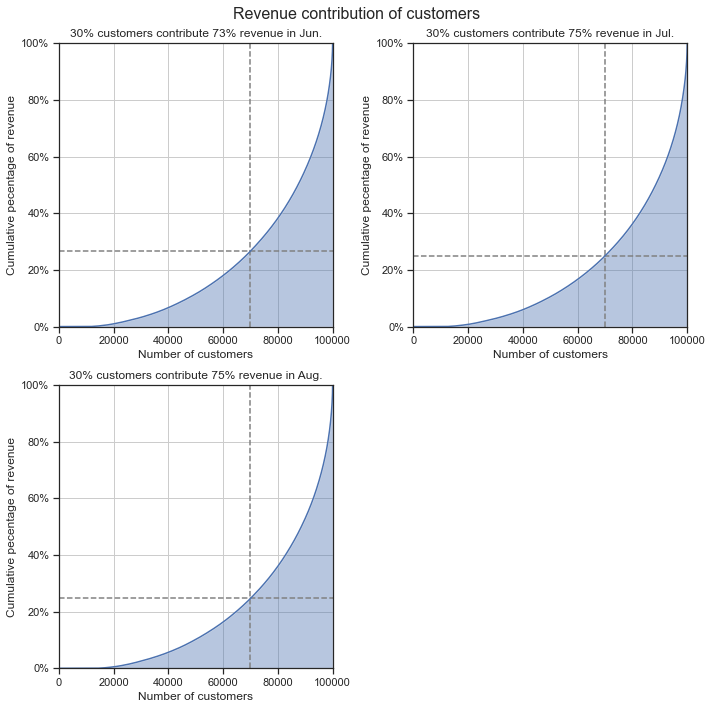

In [9]:
total_amt_cols = ['total_amt_6', 'total_amt_7', 'total_amt_8']
month_labels = ['Jun.', 'Jul.', 'Aug.']

fig = plt.figure(figsize=(10, 10), tight_layout=True)

for idx in range(len(total_amt_cols)):
    rev = telecom[total_amt_cols[idx]].sort_values().reset_index(drop=True)
    rev_pct = rev.cumsum()
    rev_pct /= rev_pct.iloc[-1]
    pct = rev_pct.quantile(0.7)
    
    ax = fig.add_subplot(2, 2, idx + 1)
    ax.plot(rev_pct)
    ax.fill_between(rev_pct.index, rev_pct.values, alpha=0.4)
    ax.vlines(x=70000, ymax=1, ymin=0, colors="gray", linestyles="--")
    ax.hlines(y=pct, xmax=100000, xmin=0, colors="gray", linestyles="--")

    ax.set_title('30% customers contribute {:.0%} revenue in {}'.format(1 - pct, month_labels[idx]))
    ax.set_ylabel('Cumulative pecentage of revenue')
    ax.set_xlabel('Number of customers')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 100000)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.grid()

fig.suptitle('Revenue contribution of customers', fontsize=16)

30% of customers contribute about 75% of the renvnue. Therefore, we should filter out these high-value customers and train our model based on them.

In [10]:
highvalue = telecom[(telecom['total_amt_6'] > telecom['total_amt_6'].quantile(0.7)) |
                    (telecom['total_amt_7'] > telecom['total_amt_7'].quantile(0.7)) |
                    (telecom['total_amt_8'] > telecom['total_amt_8'].quantile(0.7))].copy()
highvalue.shape

(46145, 232)

平均每月费用

In [11]:
# highvalue[total_amt_cols].mean().mean()

/Users/liyunfan/opt/anaconda3/envs/ids/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_amt_6', ylabel='Density'>

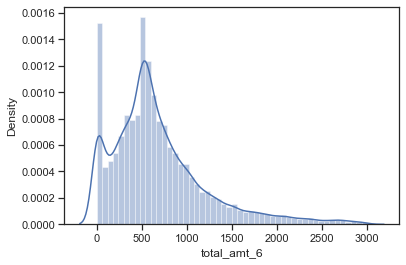

In [12]:
sns.distplot(highvalue.loc[highvalue['total_amt_6'] <= 3000, 'total_amt_6'])

/Users/liyunfan/opt/anaconda3/envs/ids/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aon', ylabel='Density'>

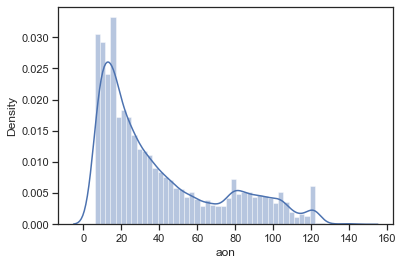

In [13]:
sns.distplot(highvalue['aon'] / 30)

In [14]:
# (highvalue['aon']/30).mean()

In [15]:
# (highvalue['aon']/30).median()

## Define Target Variable (Churn) <a class="anchor" id="define-churn"></a>

We have data from June to September.

**Definition of churn**: The churn customers don't have incoming and outgoing calls, and don't use the Internet data in September.

We have four features related to customers usage of calls and the Internet.
1. total_ic_mou_9: total incoming call time in minutes in September
2. total_og_mou_9: total outgoing call time in minutes in September
3. vol_2g_mb_9: total 2G data in MB in September
4. vol_3g_mb_9: total 3G data in MB in September

In [16]:
highvalue[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
1,188.04,72.11,0.0,0.0
3,305.38,362.54,0.0,0.0
6,2572.49,65.91,0.0,0.0
7,0.00,0.00,0.0,0.0


In [17]:
highvalue['churn_flag'] = np.where(
    (highvalue['total_ic_mou_9'] == 0.00) & (highvalue['total_og_mou_9'] == 0.00)
    & (highvalue['vol_2g_mb_9'] == 0.00) & (highvalue['vol_3g_mb_9'] == 0.00),
    1, 0)
highvalue['churn_flag'].value_counts()

0    41940
1     4205
Name: churn_flag, dtype: int64

In [18]:
churn_count = highvalue['churn_flag'].value_counts()
print('{} customers stayed (label 1) \n{} customers churned (label 0)'.format(churn_count.iloc[0], churn_count.iloc[1]))

41940 customers stayed (label 1) 
4205 customers churned (label 0)


The percentage of churn (label 1) and stayed (label 0) customers (Unbalanced dataset).

In [19]:
highvalue['churn_flag'].value_counts() * 100/highvalue.shape[0]

0    90.88742
1     9.11258
Name: churn_flag, dtype: float64

filter out data in September because we only use data from pervious months to predict.

In [20]:
highvalue = highvalue.drop(highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)
highvalue.shape

(46145, 178)

## Filter Out Useless Features: Single Unique Values & Mobile Number <a class="anchor" id="filter-single"></a>

In [21]:
unique_stats = highvalue.nunique().to_frame().reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

,feature,nunique
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
47,std_og_t2c_mou_6,1
48,std_og_t2c_mou_7,1
49,std_og_t2c_mou_8,1


In [22]:
single_cols = unique_stats.loc[unique_stats['nunique'] == 1, 'feature']
highvalue.drop(columns=single_cols, inplace=True)
highvalue.shape

(46145, 165)

In [23]:
highvalue.drop(columns=['mobile_number'], inplace=True)

## Missing Values <a class="anchor" id="missing-values"></a>

The missing value percentage for each feature

In [24]:
round((highvalue.isna().sum()*100 / highvalue.shape[0]), 2).sort_values(ascending=False)

arpu_2g_6                   55.20
date_of_last_rech_data_6    55.20
count_rech_3g_6             55.20
night_pck_user_6            55.20
count_rech_2g_6             55.20
max_rech_data_6             55.20
total_rech_data_6           55.20
av_rech_amt_data_6          55.20
fb_user_6                   55.20
total_data_rech_amt_6       55.20
arpu_3g_6                   55.20
date_of_last_rech_data_7    53.86
max_rech_data_7             53.86
count_rech_3g_7             53.86
av_rech_amt_data_7          53.86
count_rech_2g_7             53.86
total_data_rech_amt_7       53.86
arpu_2g_7                   53.86
total_rech_data_7           53.86
fb_user_7                   53.86
arpu_3g_7                   53.86
night_pck_user_7            53.86
arpu_3g_8                   52.40
arpu_2g_8                   52.40
night_pck_user_8            52.40
av_rech_amt_data_8          52.40
max_rech_data_8             52.40
count_rech_3g_8             52.40
count_rech_2g_8             52.40
total_rech_dat

### Methodologies

There are two possibilities why this feature have missing values:
1. **Customers have no transaction**, so we need to assign 0 to this feature 
2. **Our data collection system fail to collect the data**, so we can use mean, median or EM algorithm to fill it

### 1. Missing because customers have no transaction

Let's look at `arpu_2g_6`, which has highest missing rate. This feature means average revenue per user for 2g network data usage in June.

Let's check what is the actual reason for missing.

Firstly, get the data-recharge-related columns

In [25]:
rech_data_cols = ['date_of_last_rech_data', 'total_rech_data', 'max_rech_data', 
                  'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 
                  'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 
                  'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 
                  'sachet_3g', 'fb_user']

rech_cols = ['total_rech_num', 'total_rech_amt', 'max_rech_amt',
             'date_of_last_rech', 'last_day_rech_amt', 'date_of_last_rech_data',
             'total_rech_data', 'max_rech_data', 'count_rech_2g',
             'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb',
             'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g',
             'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user']

In [26]:
highvalue[highvalue['arpu_2g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].nunique()

date_of_last_rech_data_6    0
total_rech_data_6           0
max_rech_data_6             0
count_rech_2g_6             0
count_rech_3g_6             0
av_rech_amt_data_6          0
vol_2g_mb_6                 1
vol_3g_mb_6                 1
arpu_3g_6                   0
arpu_2g_6                   0
night_pck_user_6            0
monthly_2g_6                1
sachet_2g_6                 1
monthly_3g_6                1
sachet_3g_6                 1
fb_user_6                   0
dtype: int64

Observation 1: For sub-data where `arpu_2g_6` is NaN in the rows, the `arpu_2g_6` related columns only have 0 or 1 kind of values.

In [27]:
highvalue[highvalue['arpu_2g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN


Observation 2: For sub-data where `arpu_2g_6` is NaN in the rows, the `arpu_2g_6` related columns have value NaN or 0.0

Conclusion from Observation 1 & 2:
For sub-data where `arpu_2g_6` is NaN in the rows, all `arpu_2g_6` related data have value NaN or 0, **which means customers don't have transaction records for data usage.**

So fill all these columns with value 0.

In [28]:
fill_cols = ['fb_user_6', 'arpu_3g_6', 'max_rech_data_6', 'arpu_2g_6', 
             'total_rech_data_6', 'total_data_rech_amt_6', 'av_rech_amt_data_6', 
             'night_pck_user_6', 'count_rech_2g_6', 'date_of_last_rech_data_6',
             'count_rech_3g_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

fb_user_6                   0
arpu_3g_6                   0
max_rech_data_6             0
arpu_2g_6                   0
total_rech_data_6           0
total_data_rech_amt_6       0
av_rech_amt_data_6          0
night_pck_user_6            0
count_rech_2g_6             0
date_of_last_rech_data_6    0
count_rech_3g_6             0
dtype: int64

Similarly, we can use this method to fill other columns with same missing reason (no transaction records)

In [29]:
fill_cols = ['av_rech_amt_data_8', 'arpu_2g_8', 'date_of_last_rech_data_8',
             'total_data_rech_amt_8', 'total_rech_data_8', 'arpu_3g_8',
             'max_rech_data_8', 'night_pck_user_8', 'count_rech_2g_8', 
             'count_rech_3g_8', 'fb_user_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [30]:
fill_cols = ['total_rech_data_7', 'max_rech_data_7', 'date_of_last_rech_data_7', 
             'night_pck_user_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7', 
             'total_data_rech_amt_7', 'av_rech_amt_data_7', 'arpu_3g_7',
             'count_rech_2g_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [31]:
fill_cols = ['loc_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 
             'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
             'ic_others_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
             'std_og_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8',
             'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'og_others_8',
             'loc_ic_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8',
             'loc_ic_t2m_mou_8', 'offnet_mou_8', 'spl_ic_mou_8',
             'roam_og_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8',
             'std_ic_mou_8', 'roam_ic_mou_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [32]:
fill_cols = ['std_ic_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 
             'isd_og_mou_7', 'std_og_t2m_mou_7', 'spl_og_mou_7',
             'std_og_t2t_mou_7', 'og_others_7', 'loc_og_mou_7',
             'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_7',
             'loc_og_t2f_mou_7', 'loc_ic_t2f_mou_7', 'loc_og_t2m_mou_7',
             'loc_ic_mou_7', 'std_og_mou_7', 'onnet_mou_7', 
             'roam_og_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_7', 
             'roam_ic_mou_7', 'ic_others_7', 'std_ic_t2f_mou_7', 
             'offnet_mou_7', 'std_ic_t2t_mou_7', 'isd_ic_mou_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [33]:
fill_cols = ['std_ic_t2t_mou_6', 'std_ic_mou_6', 'isd_og_mou_6', 
             'spl_og_mou_6', 'isd_ic_mou_6', 'loc_ic_t2t_mou_6',
             'og_others_6', 'std_ic_t2f_mou_6', 'ic_others_6',
             'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2m_mou_6',
             'std_og_mou_6', 'loc_ic_mou_6', 'spl_ic_mou_6',
             'roam_ic_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6', 
             'loc_og_t2f_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 
             'loc_og_mou_6', 'offnet_mou_6', 'loc_og_t2m_mou_6', 
             'std_og_t2t_mou_6', 'std_og_t2f_mou_6', 'std_og_t2m_mou_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [34]:
highvalue['date_of_last_rech_7'].fillna(0, inplace=True)

In [35]:
highvalue['date_of_last_rech_6'].fillna(0, inplace=True)

### 2. Missing because data collection system fail to collect the data

This situation happened in `rech_8_cols`

In [36]:
rech_8_cols = highvalue.filter(regex='rech.*_8').columns

In [37]:
highvalue[highvalue['date_of_last_rech_8'].isna()][rech_8_cols].nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    2
total_rech_data_8           2
max_rech_data_8             2
count_rech_2g_8             2
count_rech_3g_8             1
av_rech_amt_data_8          2
total_data_rech_amt_8       2
dtype: int64

Because `date_of_last_rech_data_8` has 2 different values, let's check how the data looks like when `date_of_last_rech_data_8` is not 0.

In [38]:
non_zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                             (highvalue['date_of_last_rech_data_8'] != 0), 
                             rech_8_cols]
non_zero_row

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_data_rech_amt_8
25540,0,0,0,NaN,0,8/12/2014,1.0,154.0,1.0,0.0,154.0,154.0


As we can seen above, there is only one row where `date_of_last_rech_data_8` is not 0.

We have over 30,000 rows of data thus we can simply drop this row.

In [39]:
highvalue.drop(non_zero_row.index, inplace=True)

In [40]:
zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                         (highvalue['date_of_last_rech_data_8'] == 0), 
                         rech_8_cols]
zero_row.nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    1
total_rech_data_8           1
max_rech_data_8             1
count_rech_2g_8             1
count_rech_3g_8             1
av_rech_amt_data_8          1
total_data_rech_amt_8       1
dtype: int64

fill other `date_of_last_rech_8` as 0

In [41]:
highvalue['date_of_last_rech_8'].fillna(0, inplace=True)
highvalue['date_of_last_rech_8'].isna().sum()

0

### check whether we still have any missing values

In [42]:
highvalue.isna().values.any()

False

## Derived Features <a class="anchor" id="derive-features"></a>

### 1. Date features

Change date columns to `datetime` type

In [43]:
date_cols = highvalue.filter(regex='date').columns
for col in date_cols:
    highvalue[col] = pd.to_datetime(highvalue[col])
highvalue[date_cols].info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46144 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       46144 non-null  datetime64[ns]
 1   date_of_last_rech_7       46144 non-null  datetime64[ns]
 2   date_of_last_rech_8       46144 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  46144 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  46144 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  46144 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 2.5 MB


Derive 2 features from date:
1. `dayofweek` of the date, e.g. monday, tuesday
2. `partofmonth` of the date, e.g. early (of the month), middle, late

In [44]:
def na_category(row, original_col, c_num, func):
    # if date equal to 1970-01-01, which means date is nan
    # then our customers didn't take any actions
    if row[original_col] == dt.datetime(1970, 1, 1):
        return c_num
    # otherwise, the action took at this time
    return func(row[original_col])

In [45]:
for col in date_cols:
    highvalue['dayofweek_' + col] = highvalue.apply(
        na_category, 
        axis=1, 
        args=(col, 7, lambda x : x.dayofweek,))
    highvalue['dayofweek_' + col] = highvalue['dayofweek_' + col].map({0: 'monday',
                                                                       1: 'tuesday',
                                                                       2: 'wednesday',
                                                                       3: 'thursday',
                                                                       4: 'friday',
                                                                       5: 'saturday',
                                                                       6: 'sunday',
                                                                       7: 'no_rech'})
    highvalue['partofmonth_' + col] = highvalue.apply(
        na_category,
        axis=1,
        args=(col, 3, lambda x : min(int((x.day - 1) / 10), 2),))
    highvalue['partofmonth_' + col] = highvalue['partofmonth_' + col].map({0: 'early',
                                                                           1: 'middle',
                                                                           2: 'late',
                                                                           3: 'no_rech'})

In [46]:
highvalue.filter(regex='(dayofweek|partofmonth)').head()

,dayofweek_date_of_last_rech_6,partofmonth_date_of_last_rech_6,dayofweek_date_of_last_rech_7,partofmonth_date_of_last_rech_7,dayofweek_date_of_last_rech_8,partofmonth_date_of_last_rech_8,dayofweek_date_of_last_rech_data_6,partofmonth_date_of_last_rech_data_6,dayofweek_date_of_last_rech_data_7,partofmonth_date_of_last_rech_data_7,dayofweek_date_of_last_rech_data_8,partofmonth_date_of_last_rech_data_8
0,saturday,late,wednesday,middle,friday,early,saturday,late,wednesday,middle,friday,early
1,sunday,late,thursday,late,thursday,late,no_rech,no_rech,friday,late,sunday,early
3,saturday,late,thursday,late,sunday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech
6,saturday,late,thursday,late,thursday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech
7,friday,late,friday,late,tuesday,late,no_rech,no_rech,no_rech,no_rech,no_rech,no_rech


one-hot encoding dummy variable

In [47]:
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'dayofweek_' + x, date_cols)))
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'partofmonth_' + x, date_cols)))

In [48]:
highvalue.filter(regex='(dayofweek|partofmonth)').head()

,dayofweek_date_of_last_rech_6_friday,dayofweek_date_of_last_rech_6_monday,dayofweek_date_of_last_rech_6_no_rech,dayofweek_date_of_last_rech_6_saturday,dayofweek_date_of_last_rech_6_sunday,dayofweek_date_of_last_rech_6_thursday,dayofweek_date_of_last_rech_6_tuesday,dayofweek_date_of_last_rech_6_wednesday,dayofweek_date_of_last_rech_7_friday,dayofweek_date_of_last_rech_7_monday,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_7_saturday,dayofweek_date_of_last_rech_7_sunday,dayofweek_date_of_last_rech_7_thursday,dayofweek_date_of_last_rech_7_tuesday,dayofweek_date_of_last_rech_7_wednesday,dayofweek_date_of_last_rech_8_friday,dayofweek_date_of_last_rech_8_monday,dayofweek_date_of_last_rech_8_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_thursday,dayofweek_date_of_last_rech_8_tuesday,dayofweek_date_of_last_rech_8_wednesday,dayofweek_date_of_last_rech_data_6_friday,dayofweek_date_of_last_rech_data_6_monday,dayofweek_date_of_last_rech_data_6_no_rech,dayofweek_date_of_last_rech_data_6_saturday,dayofweek_date_of_last_rech_data_6_sunday,dayofweek_date_of_last_rech_data_6_thursday,dayofweek_date_of_last_rech_data_6_tuesday,dayofweek_date_of_last_rech_data_6_wednesday,dayofweek_date_of_last_rech_data_7_friday,dayofweek_date_of_last_rech_data_7_monday,dayofweek_date_of_last_rech_data_7_no_rech,dayofweek_date_of_last_rech_data_7_saturday,dayofweek_date_of_last_rech_data_7_sunday,dayofweek_date_of_last_rech_data_7_thursday,dayofweek_date_of_last_rech_data_7_tuesday,dayofweek_date_of_last_rech_data_7_wednesday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_no_rech,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_6_early,partofmonth_date_of_last_rech_6_late,partofmonth_date_of_last_rech_6_middle,partofmonth_date_of_last_rech_6_no_rech,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_7_late,partofmonth_date_of_last_rech_7_middle,partofmonth_date_of_last_rech_7_no_rech,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_8_no_rech,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_6_no_rech,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_7_no_rech,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,partofmonth_date_of_last_rech_data_8_no_rech
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1


drop original date cols

In [49]:
highvalue.drop(date_cols, axis=1, inplace=True)

### 2. Month-to-month change features

These features are calculated by the data from the last month and the current month. Basically, it's xxx_lastmonth / xxx_thismonth. 

Take `arpu` (Average Revenue Per User) for example:

$$
arpu\_7over6 = \frac{arpu\_7}{arpu\_6}
$$

However, **we may have denominator as 0 or negative values**. So we slightly change the formula:

$$
arpu\_7over6 = \frac{arpu\_7 + (-1)^{1\{arpu\_7 < 0\}}}{arpu\_6 + (-1)^{1\{arpu\_6 < 0\}}}
$$

Note that $1\{arpu\_7 < 0\}$ equals 1 if `arpu_7` < 0 otherwise it equals 0.

Now, to define a python function for this formula

In [50]:
def gen_over_cols(cols):
    for col in set(map(lambda x : x[:-2], cols)):
        adjust_6 = highvalue[col + '_6'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_7 = highvalue[col + '_7'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_8 = highvalue[col + '_8'].apply(lambda x : x + (1 if x >= 0 else -1))
        
        highvalue[col + '_7over6'] = (adjust_7 / adjust_6)
        highvalue[col + '_8over7'] = (adjust_8 / adjust_7)

Now let's derive month-to-month change data for usage and recharge columns

In [51]:
mou_cols = highvalue.filter(regex='mou').columns
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [52]:
gen_over_cols(mou_cols)

highvalue[highvalue.filter(regex='mou.*(7over6|8over7)').columns].head()

,isd_og_mou_7over6,isd_og_mou_8over7,loc_og_t2t_mou_7over6,loc_og_t2t_mou_8over7,loc_og_t2m_mou_7over6,loc_og_t2m_mou_8over7,loc_ic_t2m_mou_7over6,loc_ic_t2m_mou_8over7,loc_og_t2f_mou_7over6,loc_og_t2f_mou_8over7,std_og_t2f_mou_7over6,std_og_t2f_mou_8over7,roam_ic_mou_7over6,roam_ic_mou_8over7,loc_og_mou_7over6,loc_og_mou_8over7,std_ic_t2f_mou_7over6,std_ic_t2f_mou_8over7,total_ic_mou_7over6,total_ic_mou_8over7,std_og_t2t_mou_7over6,std_og_t2t_mou_8over7,std_ic_mou_7over6,std_ic_mou_8over7,loc_ic_t2f_mou_7over6,loc_ic_t2f_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,onnet_mou_7over6,onnet_mou_8over7,total_og_mou_7over6,total_og_mou_8over7,spl_og_mou_7over6,spl_og_mou_8over7,isd_ic_mou_7over6,isd_ic_mou_8over7,std_ic_t2t_mou_7over6,std_ic_t2t_mou_8over7,roam_og_mou_7over6,roam_og_mou_8over7,offnet_mou_7over6,offnet_mou_8over7,std_og_mou_7over6,std_og_mou_8over7,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_8over7,std_ic_t2m_mou_7over6,std_ic_t2m_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,loc_og_t2c_mou_7over6,loc_og_t2c_mou_8over7
0,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.130000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.440000,1.000000,1.000000,1.000000,1.000000,1.000000,2.150000,1.000000,1.160000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,6.440000,1.000000,1.000000
1,1.00,1.000000,3.036977,0.114876,6.150280,3.806343,3.591991,5.673094,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.163506,1.983631,1.000000,1.000000,3.781171,4.031930,4.154472,0.195695,0.144928,15.840000,9.930000,0.464250,11.842912,0.978001,3.173238,0.108936,4.345921,1.745892,4.301056,0.563242,0.353357,1.000000,1.000000,3.350000,1.000000,1.000000,6.023895,3.032130,4.536585,0.202509,1.460000,0.773973,1.000000,1.0,0.144928,13.490000,5.237929,3.890811,3.910000,0.255754
3,1.00,1.000000,0.479513,0.324211,0.776630,0.278589,0.569850,0.324836,0.567010,3.581818,1.000000,1.00000,55.860000,0.812388,0.650329,0.325785,0.458716,1.000000,0.774192,0.248748,0.583548,18.286973,2.256012,0.056032,0.480746,0.741901,0.332594,0.430887,0.548905,5.632425,0.607903,2.591226,0.083612,19.090000,1.000000,1.000000,1.516187,0.014828,29.090000,1.376418,0.884965,0.660667,0.583196,16.852524,0.684211,2.758242,0.628931,1.0,16.978541,0.150152,0.480169,0.436806,1.000000,1.000000
6,1.00,1.000000,0.639039,1.675864,0.196304,1.642124,1.353789,0.787904,0.087873,1.000000,1.000000,1.00000,1.000000,1.000000,0.283110,1.665400,1.000000,1.000000,0.840167,1.211871,1.000000,1.510000,0.736402,2.045455,1.115348,0.148164,0.768181,1.328695,0.639039,1.687161,0.286205,1.771631,1.378378,0.653595,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.190498,1.852707,1.530000,8.470588,1.530000,8.137255,1.000000,1.0,0.736402,2.045455,0.840133,1.211175,0.900901,1.000000
7,1.18,9.330508,0.618057,1.274861,1.448115,0.364155,1.017981,0.549193,0.889276,0.965978,2.751958,0.83871,2.001741,0.946361,1.264085,0.480062,0.662531,0.658627,0.890957,0.768711,4.583019,0.535611,0.958907,1.119830,0.668974,0.395569,0.562394,0.851173,0.946295,0.957076,1.249135,0.575446,0.181818,7.500000,5.075163,2.098519,0.338612,2.446610,0.549313,2.874172,1.250270,0.575384,1.230844,1.035461,0.643741,1.530525,0.826446,1.0,1.384574,1.112040,0.830605,0.530668,1.000000,1.000000


In [53]:
other_cols = highvalue.filter(regex='other').columns
other_cols

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [54]:
gen_over_cols(other_cols)

highvalue[highvalue.filter(regex='other.*(7over6|8over7)').columns].head()

,ic_others_7over6,ic_others_8over7,og_others_7over6,og_others_8over7
0,1.000000,1.000000,1.0,1.0
1,1.000000,1.000000,1.0,1.0
3,1.000000,1.000000,1.0,1.0
6,1.423423,0.810127,1.0,1.0
7,0.967145,0.996912,1.0,1.0


In [55]:
data_cols = highvalue.filter(regex='(2g|3g)').columns
data_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [56]:
gen_over_cols(data_cols)

highvalue[highvalue.filter(regex='(2g|3g).*(7over6|8over7)').columns].head()

,vol_3g_mb_7over6,vol_3g_mb_8over7,arpu_2g_7over6,arpu_2g_8over7,sachet_3g_7over6,sachet_3g_8over7,count_rech_2g_7over6,count_rech_2g_8over7,sachet_2g_7over6,sachet_2g_8over7,arpu_3g_7over6,arpu_3g_8over7,vbc_3g_7over6,vbc_3g_8over7,monthly_3g_7over6,monthly_3g_8over7,vol_2g_mb_7over6,vol_2g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,count_rech_3g_7over6,count_rech_3g_8over7
0,1.79449,0.728848,1.00,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.009785,31.400000,1.0,1.0,0.074526,2.909483,1.0,1.0,1.0,1.0
1,1.00000,1.000000,29.61,0.290442,1.0,1.0,2.0,1.5,1.0,3.0,1.0,1.0,1.000000,1.000000,1.0,1.0,109.070000,3.359952,2.0,0.5,1.0,1.0
3,1.00000,1.000000,1.00,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0
6,1.00000,1.000000,1.00,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0
7,1.00000,1.000000,1.00,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.032421,2.882237,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0


In [57]:
arpu_cols = highvalue.filter(regex='arpu_(?!(2g|3g))').columns
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

In [58]:
gen_over_cols(arpu_cols)

highvalue[highvalue.filter(regex='arpu.*(7over6|8over7)').columns].head()

,arpu_2g_7over6,arpu_2g_8over7,arpu_3g_7over6,arpu_3g_8over7,arpu_7over6,arpu_8over7
0,1.00,1.000000,1.0,1.0,1.087865,0.995306
1,29.61,0.290442,1.0,1.0,10.159900,0.756362
3,1.00,1.000000,1.0,1.0,1.133868,2.019238
6,1.00,1.000000,1.0,1.0,0.445799,1.335987
7,1.00,1.000000,1.0,1.0,1.262264,2.348506


In [59]:
highvalue.shape

(46144, 312)

## Section B Visualization

#### The first graph

 Total top-up cost ratio of the two adjacent months in relation to lost customers

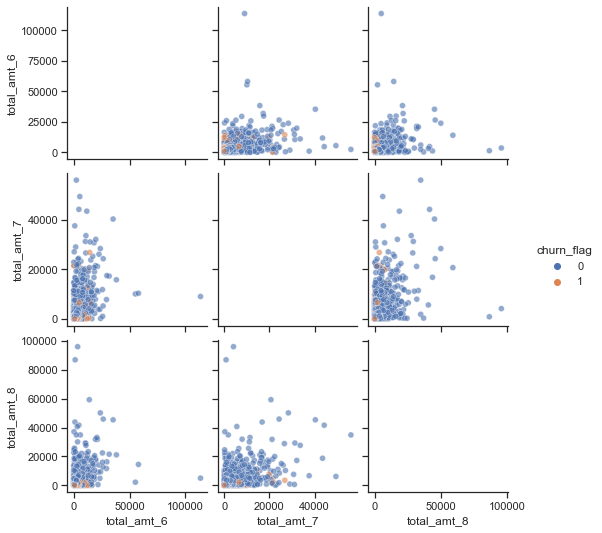

In [93]:
sns.pairplot(
    data=highvalue[['total_amt_6','total_amt_7','total_amt_8','churn_flag']],
    hue='churn_flag',
    diag_kind='None',
    plot_kws={'alpha': 0.6},
)
plt.show()

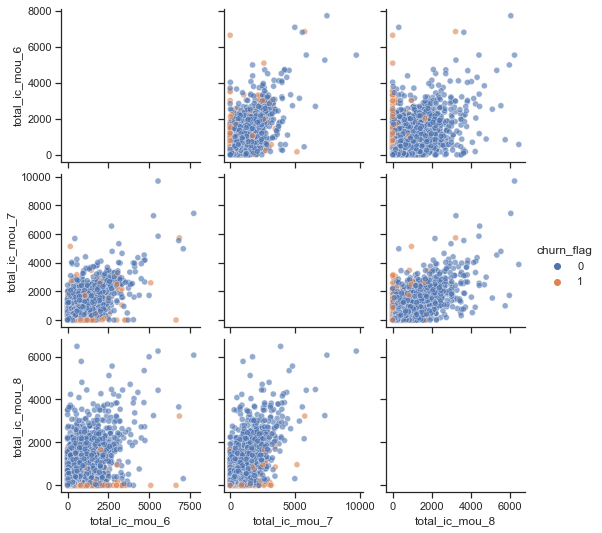

In [94]:
sns.pairplot(
    data=highvalue[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],
    hue='churn_flag',
    diag_kind='None',
    plot_kws={'alpha': 0.6},
)
plt.show()

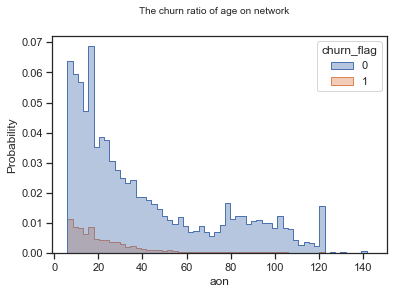

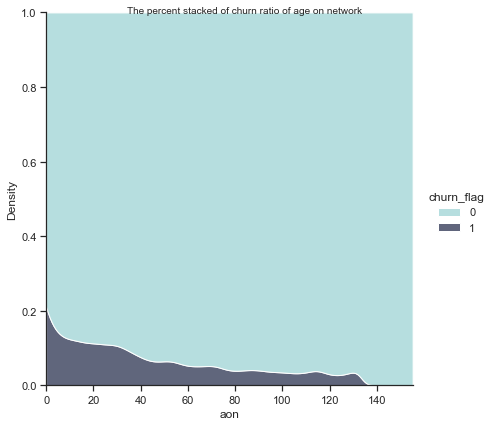

In [103]:
ax= sns.histplot(
    highvalue,x=highvalue['aon'] / 30,
    hue='churn_flag', 
    element="step",
    stat="probability",
    alpha=0.4, 
    common_norm=True,
    discrete=None
)
plt.suptitle('The churn ratio of age on network', fontsize=10)

ax= sns.displot(
    data=highvalue, 
    x=highvalue['aon'] / 30,
    hue="churn_flag",
    kind="kde", 
    height=6,
    multiple="fill", 
    clip=(0, None), 
    alpha=0.7,
    palette="ch:rot=-.25,hue=1,light=0.75",
)
plt.suptitle('The percent stacked of churn ratio of age on network', fontsize=10)

plt.show()

<AxesSubplot:xlabel='aon', ylabel='Count'>

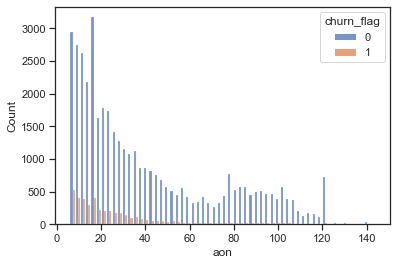

In [64]:
sns.histplot(data=highvalue, x=highvalue['aon'] / 30, hue="churn_flag", multiple="dodge", shrink=0.8)

In [111]:
loc_og_t2m_cols = highvalue.filter(regex='loc_og_t2m_mou').columns
loc_og_t2m_cols

Index(['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_7over6', 'loc_og_t2m_mou_8over7'],
      dtype='object')

In [130]:
a = highvalue['loc_og_t2m_mou_6'] + highvalue['loc_og_t2m_mou_7']+highvalue['loc_og_t2m_mou_8'] 
b = highvalue['loc_og_t2t_mou_6']+highvalue['loc_og_t2t_mou_7']+highvalue['loc_og_t2t_mou_8']
(a/b)

0                 NaN
1        3.574350e+00
3        1.789253e+00
6        1.985276e+00
7        7.462739e+00
8        3.833008e-01
13       5.367200e+00
15       2.158897e+00
16       3.126235e+00
17       1.501411e+00
19       4.669927e-01
21       8.374044e+00
23       2.361186e+00
24       7.194692e+00
33                NaN
38       1.215558e+00
40       1.481855e+00
41       1.489202e+00
44       5.808248e-01
47       4.603948e+00
48       1.592919e+00
51                inf
53       1.767279e+00
54       9.754167e+00
56       2.243720e+00
57       1.081403e+01
60       2.982332e+00
61       5.964055e-01
63       1.645005e+00
67                NaN
68       3.289831e+01
69       3.691023e+00
73       3.284359e+00
77       7.275446e-01
82       5.180466e-02
86       3.520659e-01
87       1.641748e+00
91                inf
92       1.980322e+00
96       1.119343e+01
101      1.029610e+00
102      8.526002e+00
103      1.743793e+00
104               NaN
105      3.251433e-01
107      2

In [114]:
highvalue[loc_og_t2m_cols].head(50)

,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_7over6,loc_og_t2m_mou_8over7
0,0.00,0.00,0.00,1.000000,1.000000
1,11.51,75.94,291.86,6.150280,3.806343
3,107.43,83.21,22.46,0.776630,0.278589
6,252.23,48.71,80.63,0.196304,1.642124
7,308.63,447.38,162.28,1.448115,0.364155
8,80.96,70.58,50.54,0.873353,0.720034
13,151.13,47.28,294.46,0.317360,6.119718
15,0.00,38.99,92.53,39.990000,2.338835
16,273.29,145.99,128.28,0.535893,0.879516
17,58.54,0.00,0.00,0.016795,1.000000


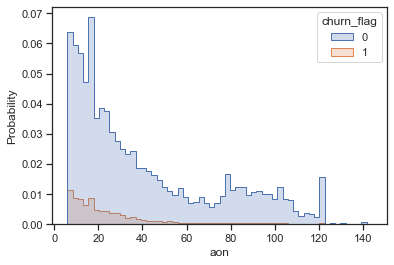

In [104]:
ax= sns.histplot(
    highvalue,x=highvalue['aon'] / 30,
    hue='churn_flag', 
    element="step",
    stat="probability",
    common_norm=True,discrete=None
)

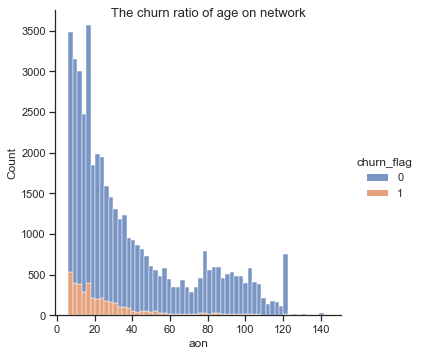

In [66]:
sns.displot(highvalue,x=highvalue['aon'] / 30,hue='churn_flag', kde=None,multiple="stack")

plt.suptitle('The churn ratio of age on network', fontsize=13)
plt.show()

/Users/liyunfan/opt/anaconda3/envs/ids/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liyunfan/opt/anaconda3/envs/ids/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


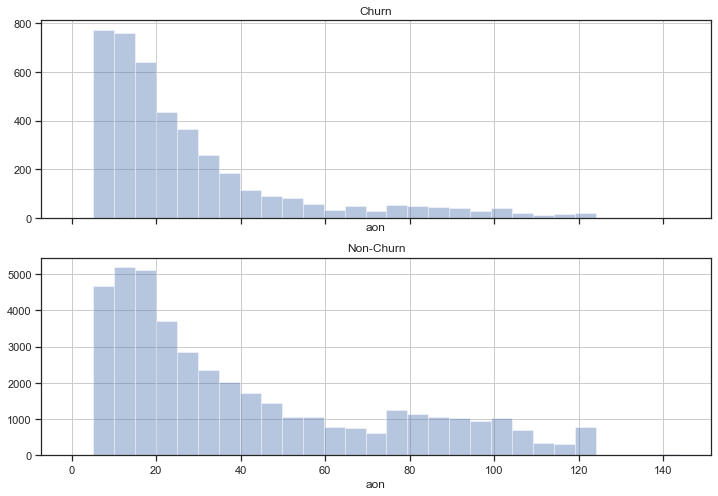

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12, 8), sharex=True)
ax = sns.distplot(highvalue[highvalue['churn_flag']==1].aon/30, bins = [  0.        ,   4.96666667,   9.93333333,  14.9       ,
        19.86666667,  24.83333333,  29.8       ,  34.76666667,
        39.73333333,  44.7       ,  49.66666667,  54.63333333,
        59.6       ,  64.56666667,  69.53333333,  74.5       ,
        79.46666667,  84.43333333,  89.4       ,  94.36666667,
        99.33333333, 104.3       , 109.26666667, 114.23333333,
       119.2       , 124.16666667, 129.13333333, 134.1       ,
       139.06666667, 144.03333333], ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid(1)
ax = sns.distplot(highvalue[highvalue['churn_flag']==0].aon/30, bins = [  0.        ,   4.96666667,   9.93333333,  14.9       ,
        19.86666667,  24.83333333,  29.8       ,  34.76666667,
        39.73333333,  44.7       ,  49.66666667,  54.63333333,
        59.6       ,  64.56666667,  69.53333333,  74.5       ,
        79.46666667,  84.43333333,  89.4       ,  94.36666667,
        99.33333333, 104.3       , 109.26666667, 114.23333333,
       119.2       , 124.16666667, 129.13333333, 134.1       ,
       139.06666667, 144.03333333], ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid(2)
plt.show()